In [45]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
from plotly.validators.bar import marker
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Set the theme and styles
sns.set_theme(style='ticks', font_scale=2.0, rc={'text.usetex': True})
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'

In [46]:
scaler = MinMaxScaler()

with open("../code/btree/build/Release/output.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']

btree_df = pd.DataFrame(benchmarks)

btree_df['real_time_ms'] = btree_df['real_time'] / 1e6
btree_df['cpu_time_ms'] = btree_df['cpu_time'] / 1e6
btree_df['RAM'] = btree_df['RAM'].astype(int)
btree_df['Page'] = btree_df['Page'].astype(int)


for i in range(btree_df.size):
  btree_df['b'] = pd.to_numeric(btree_df['name'].str.extract(r'<(\d+)>')[0])


btree_df['cpu_time_ms_norm'] = scaler.fit_transform(btree_df[['cpu_time_ms']])
btree_df['RAM_norm'] = scaler.fit_transform(btree_df[['RAM']])
btree_df['Page_norm'] = scaler.fit_transform(btree_df[['Page']])

btree_df

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit,Page,RAM,real_time_ms,cpu_time_ms,b,cpu_time_ms_norm,RAM_norm,Page_norm
0,BM_MapInsertion<2>/20000000,0,0,BM_MapInsertion<2>/20000000,iteration,1,0,1,1,1.072065e+14,5.935938e+10,ns,1294456,1250332,1.072065e+08,59359.375,2,0.000000,1.000000,1.000000
1,BM_MapInsertion<4>/20000000,1,0,BM_MapInsertion<4>/20000000,iteration,1,0,1,1,1.072346e+14,8.696875e+10,ns,539168,524740,1.072346e+08,86968.750,4,0.170791,0.355701,0.355545
2,BM_MapInsertion<6>/20000000,2,0,BM_MapInsertion<6>/20000000,iteration,1,0,1,1,1.072546e+14,1.064844e+11,ns,375208,364900,1.072546e+08,106484.375,6,0.291514,0.213768,0.215645
3,BM_MapInsertion<8>/20000000,3,0,BM_MapInsertion<8>/20000000,iteration,1,0,1,1,1.072719e+14,1.232656e+11,ns,302968,293932,1.072719e+08,123265.625,8,0.395322,0.150751,0.154006
4,BM_MapInsertion<16>/20000000,4,0,BM_MapInsertion<16>/20000000,iteration,1,0,1,1,1.072842e+14,1.351562e+11,ns,202252,197996,1.072842e+08,135156.250,16,0.468877,0.065564,0.068069
5,BM_MapInsertion<32>/20000000,5,0,BM_MapInsertion<32>/20000000,iteration,1,0,1,1,1.072938e+14,1.446406e+11,ns,156320,153472,1.072938e+08,144640.625,32,0.527547,0.026028,0.028878
6,BM_MapInsertion<64>/20000000,6,0,BM_MapInsertion<64>/20000000,iteration,1,0,1,1,1.073031e+14,1.537500e+11,ns,135372,133308,1.073031e+08,153750.000,64,0.583897,0.008123,0.011004
7,BM_MapInsertion<128>/20000000,7,0,BM_MapInsertion<128>/20000000,iteration,1,0,1,1,1.073130e+14,1.633125e+11,ns,129468,127528,1.073130e+08,163312.500,128,0.643050,0.002991,0.005966
8,BM_MapInsertion<256>/20000000,8,0,BM_MapInsertion<256>/20000000,iteration,1,0,1,1,1.073239e+14,1.740625e+11,ns,135368,132308,1.073239e+08,174062.500,256,0.709550,0.007235,0.011000
9,BM_MapInsertion<512>/20000000,9,0,BM_MapInsertion<512>/20000000,iteration,1,0,1,1,1.073361e+14,1.860781e+11,ns,142356,138496,1.073361e+08,186078.125,512,0.783878,0.012730,0.016963


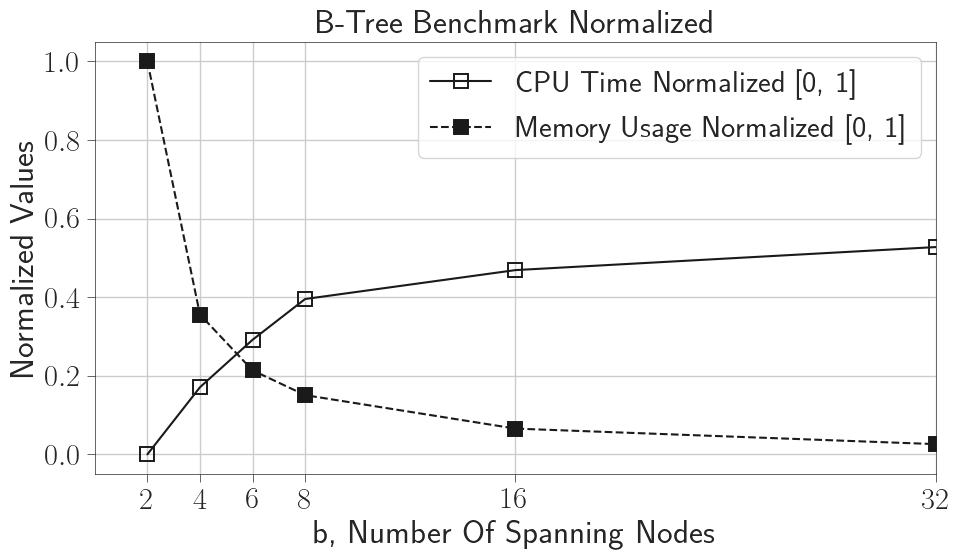

In [77]:
# Plot the data
f, ax = plt.subplots(figsize=(10, 6))

# sns.lineplot(
#     data=df,
#     x='name',
#     y='real_time_ms',
#     marker='o',
#     linewidth=1.5,
#     label='Real Time (ms)',
#     ax=ax
# )

sns.lineplot(
    data=btree_df,
    x='b',
    y='cpu_time_ms_norm',
    marker='s',
    markerfacecolor='none',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='CPU Time Normalized [0, 1]',
    ax=ax
)

sns.lineplot(
    data=btree_df,
    x='b',
    y='RAM_norm',
    marker='s',
    # markerfacecolor='none',
    linestyle='--',
    markeredgecolor='k',
    markeredgewidth=1.4,
    markersize=10,
    color='k',
    linewidth=1.5,
    label='Memory Usage Normalized [0, 1]',
    ax=ax
)

ax.set_title("B-Tree Benchmark Normalized")
ax.set_xlabel('b, Number Of Spanning Nodes')
ax.set_ylabel('Normalized Values')
ax.grid(True)
ax.legend()
ax.tick_params(width=0.5)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.xticks(btree_df['b'])

plt.xlim([0, 32])

plt.tight_layout()
plt.savefig(ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
plt.show()

In [89]:
"optimum b = " + str(btree_df.loc[np.argmin(np.abs(btree_df['RAM_norm'] - btree_df['cpu_time_ms_norm'])), 'b'])

'optimum b = 6'

Second part

In [163]:
with open("../code/btree/build/Release/output_over_n.json") as f:
    data = json.load(f)

benchmarks = data['benchmarks']

btree_df = pd.DataFrame(benchmarks)

btree_df['real_time_ms'] = btree_df['real_time'] / 1e6
btree_df['cpu_time_ms'] = btree_df['cpu_time'] / 1e6
btree_df['RAM'] = btree_df['RAM'].astype(int)
btree_df['Page'] = btree_df['Page'].astype(int)

btree_df['n'] = btree_df['name'].apply(lambda x: pd.to_numeric(x.split('/')[1]) if len(x.split('/')) > 1 else None)
btree_df['name'] = btree_df['name'].apply(lambda x: x.split('/')[0] if '/' in x else x)

btree_df['cpu_time_ms_norm'] = scaler.fit_transform(btree_df[['cpu_time_ms']])
btree_df['RAM_norm'] = scaler.fit_transform(btree_df[['RAM']])
btree_df['Page_norm'] = scaler.fit_transform(btree_df[['Page']])

btree_df.drop(columns=['iterations', 'repetition_index', 'run_name', 'repetitions', 'threads', 'run_type', 'family_index', 'per_family_instance_index', 'time_unit'], inplace=True)

btree_df

,name,real_time,cpu_time,Page,RAM,real_time_ms,cpu_time_ms,n,cpu_time_ms_norm,RAM_norm,Page_norm
0,OrderedMapInsertion,1.133241e+14,1.562500e+07,0,4,1.133241e+08,15.625,8,0.000000,0.000010,0.000000
1,OrderedMapInsertion,1.133241e+14,1.562500e+07,0,0,1.133241e+08,15.625,16,0.000000,0.000000,0.000000
2,OrderedMapInsertion,1.133241e+14,1.562500e+07,0,0,1.133241e+08,15.625,32,0.000000,0.000000,0.000000
3,OrderedMapInsertion,1.133241e+14,1.562500e+07,0,0,1.133241e+08,15.625,64,0.000000,0.000000,0.000000
4,OrderedMapInsertion,1.133241e+14,1.562500e+07,0,0,1.133241e+08,15.625,128,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
79,BTreeMapInsertion<6>,1.133790e+14,5.351562e+10,9608,9352,1.133790e+08,53515.625,524288,0.843350,0.023691,0.022652
80,BTreeMapInsertion<6>,1.133793e+14,5.378125e+10,19752,19092,1.133793e+08,53781.250,1048576,0.847537,0.048365,0.046568
81,BTreeMapInsertion<6>,1.133802e+14,5.465625e+10,39376,38324,1.133802e+08,54656.250,2097152,0.861330,0.097084,0.092834
82,BTreeMapInsertion<6>,1.133827e+14,5.701562e+10,78872,76500,1.133827e+08,57015.625,4194304,0.898522,0.193793,0.185950


In [157]:
names = pd.unique(btree_df['name'])


array(['OrderedMapInsertion', 'BTreeMapInsertion<4>',
       'BTreeMapInsertion<5>', 'BTreeMapInsertion<6>'], dtype=object)

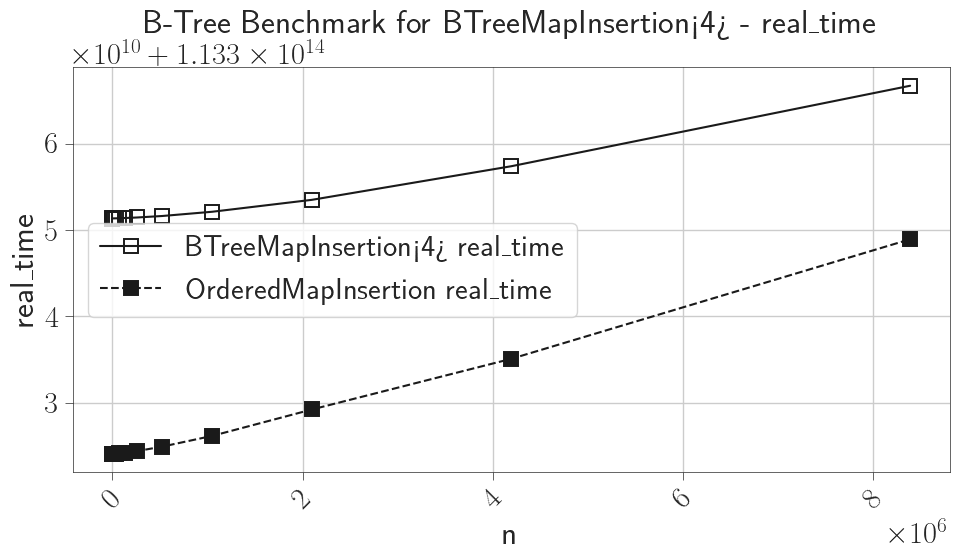

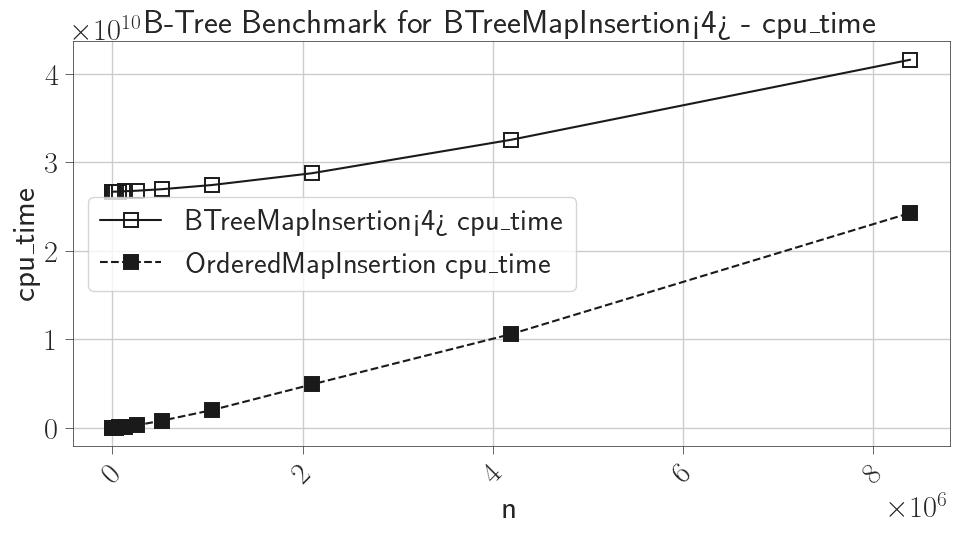

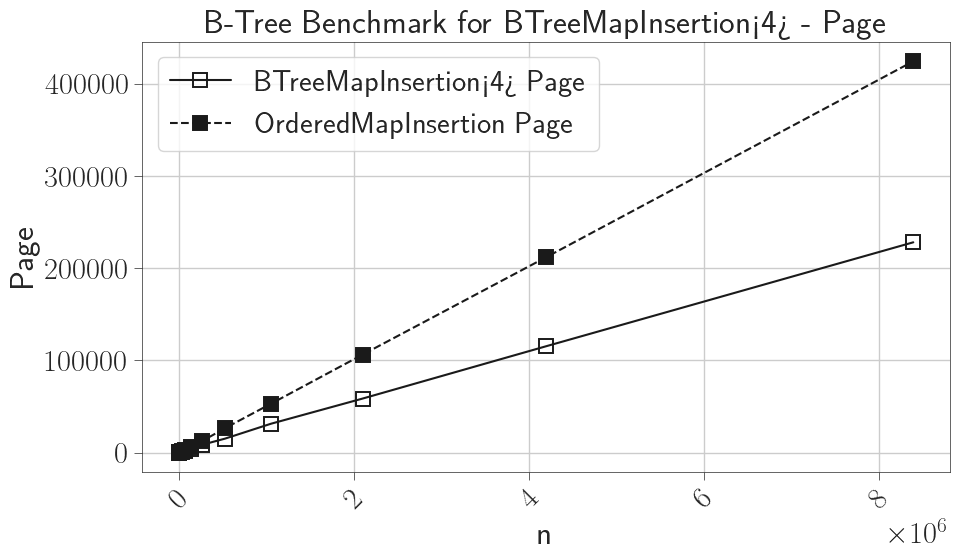

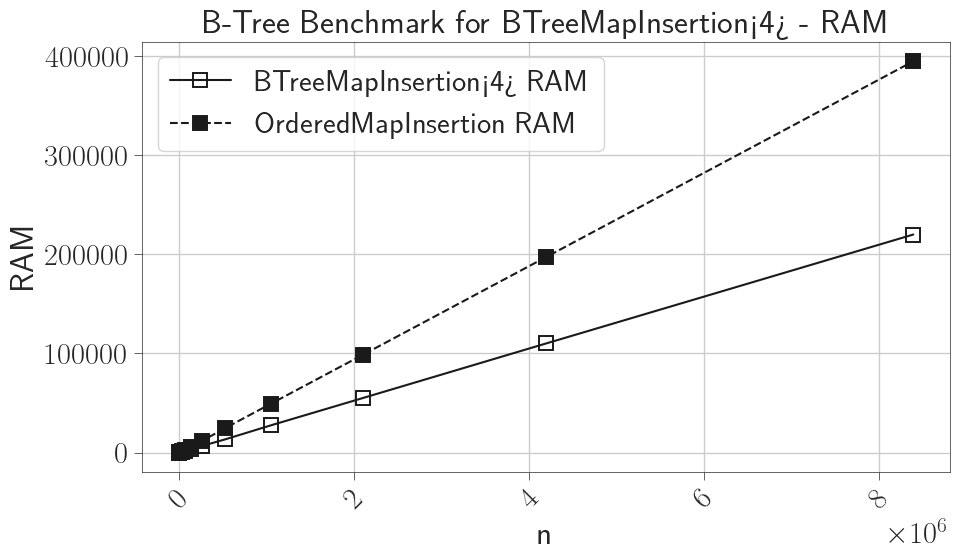

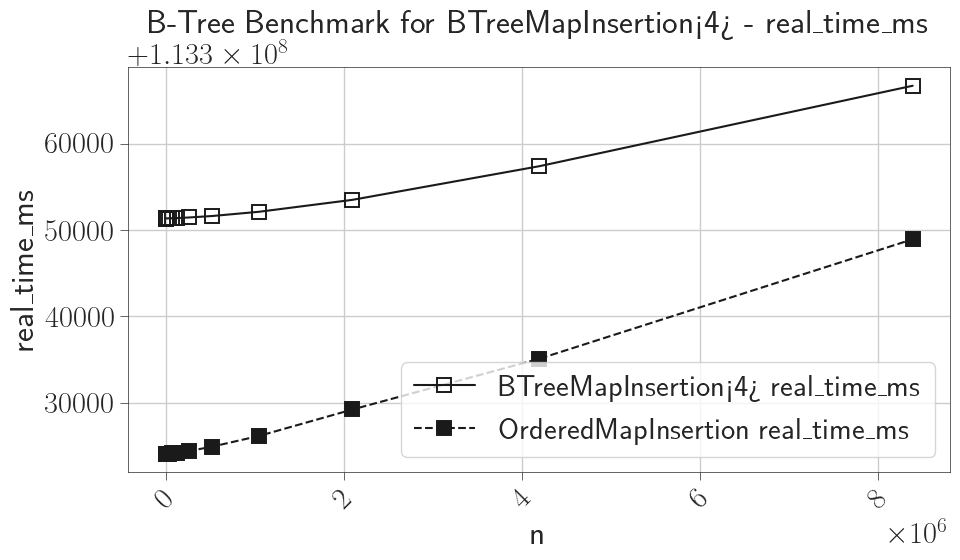

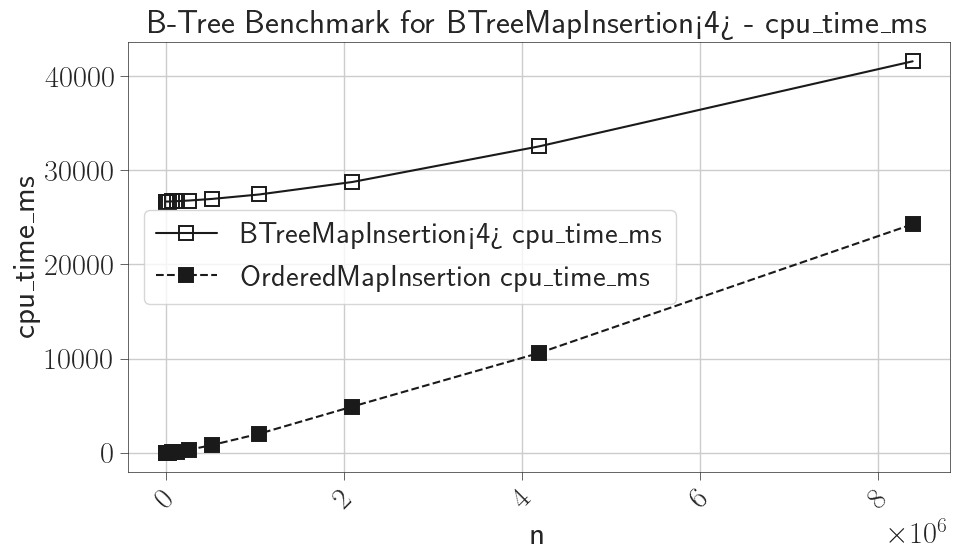

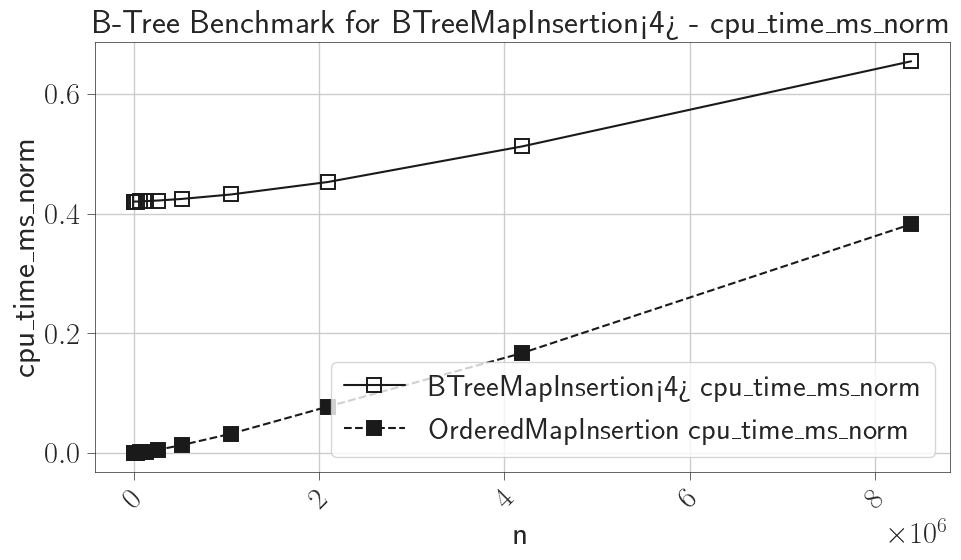

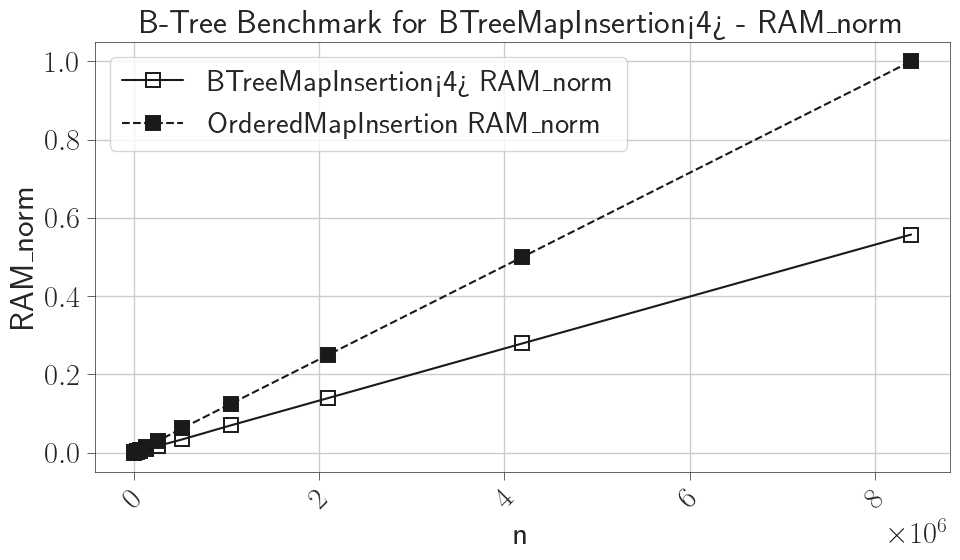

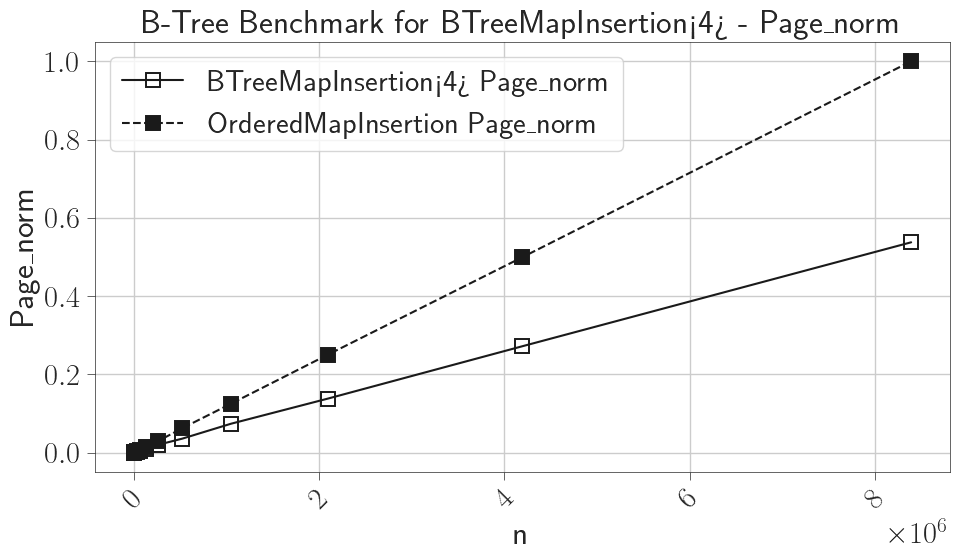

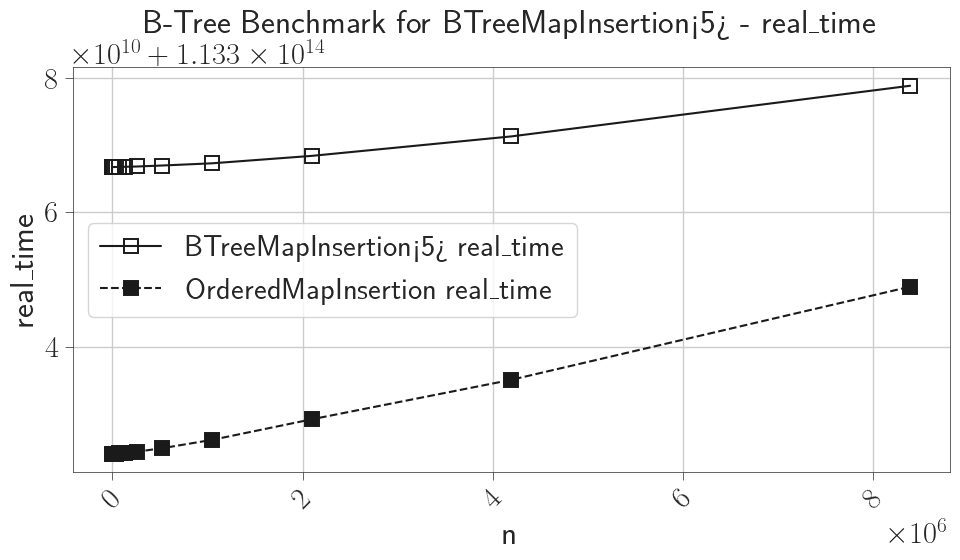

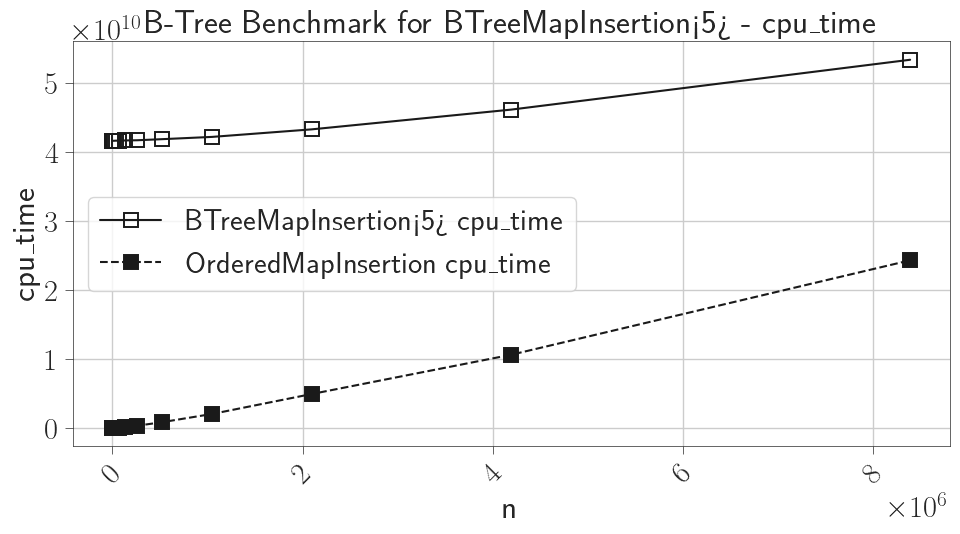

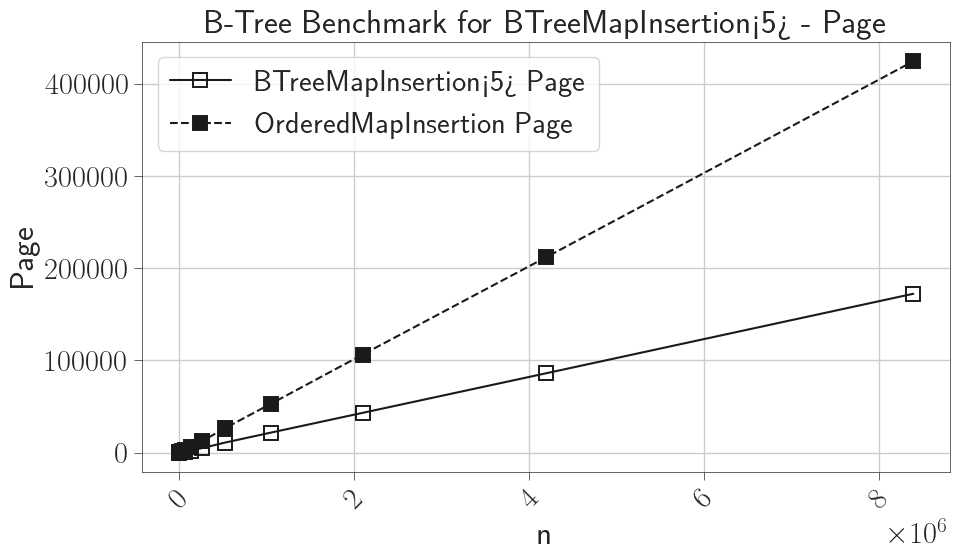

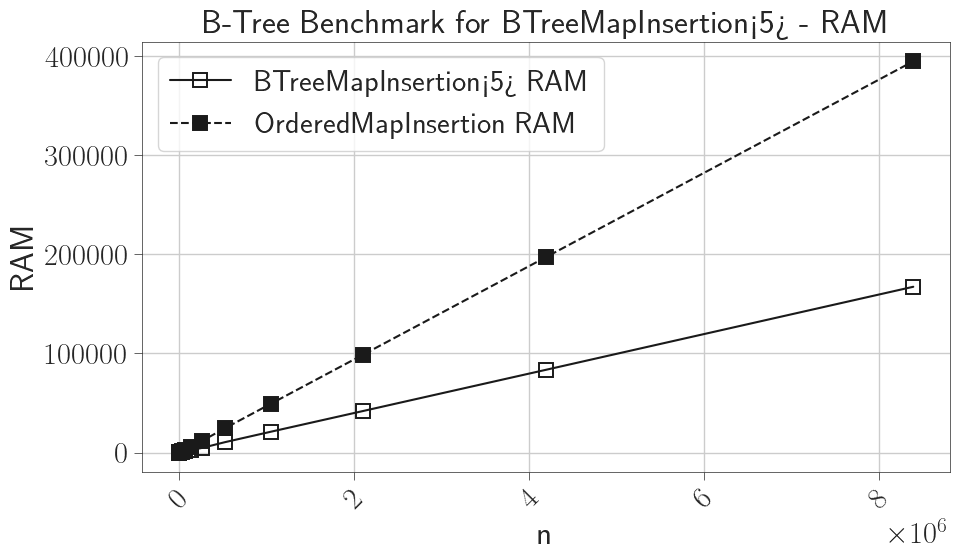

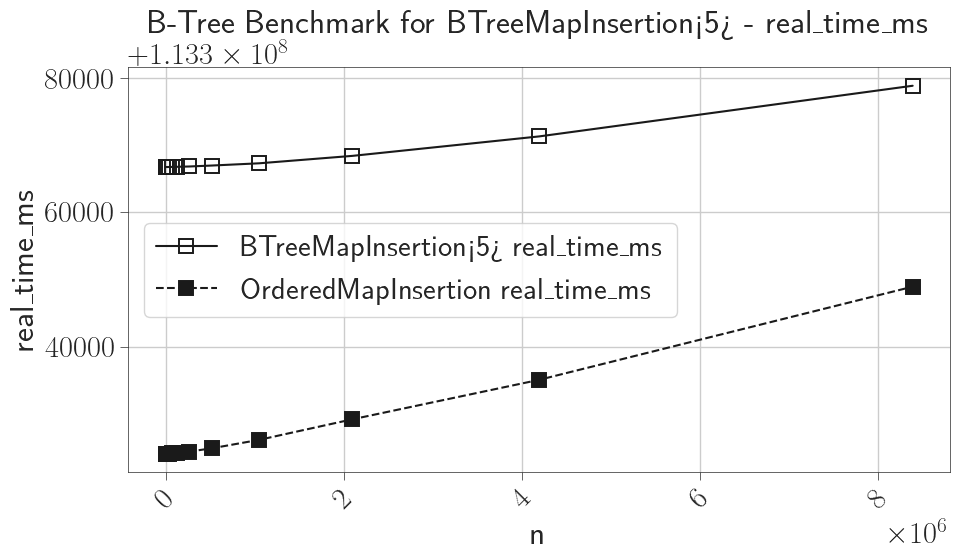

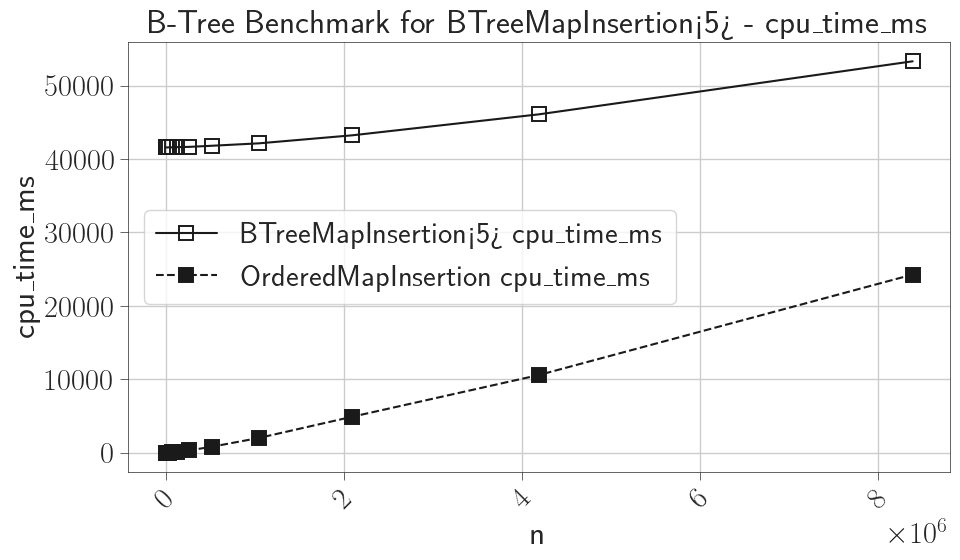

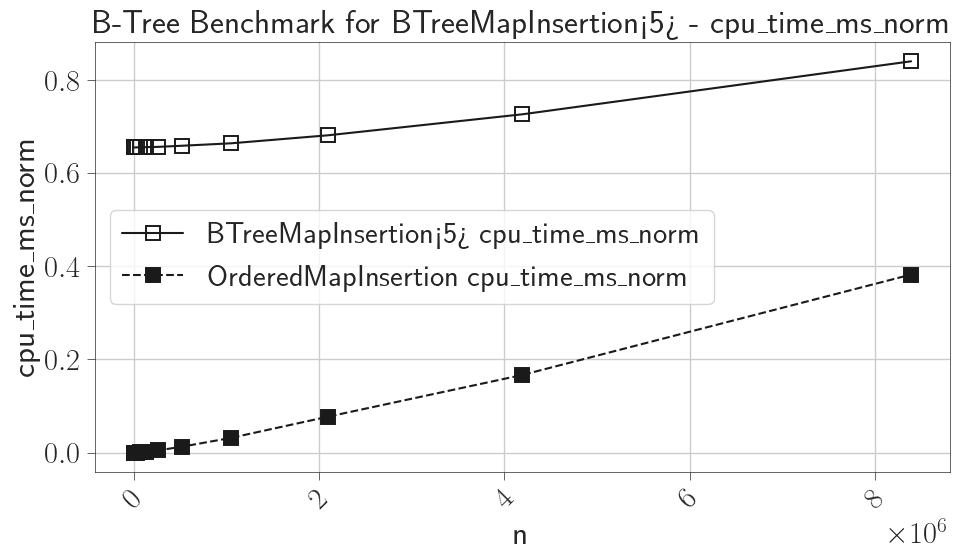

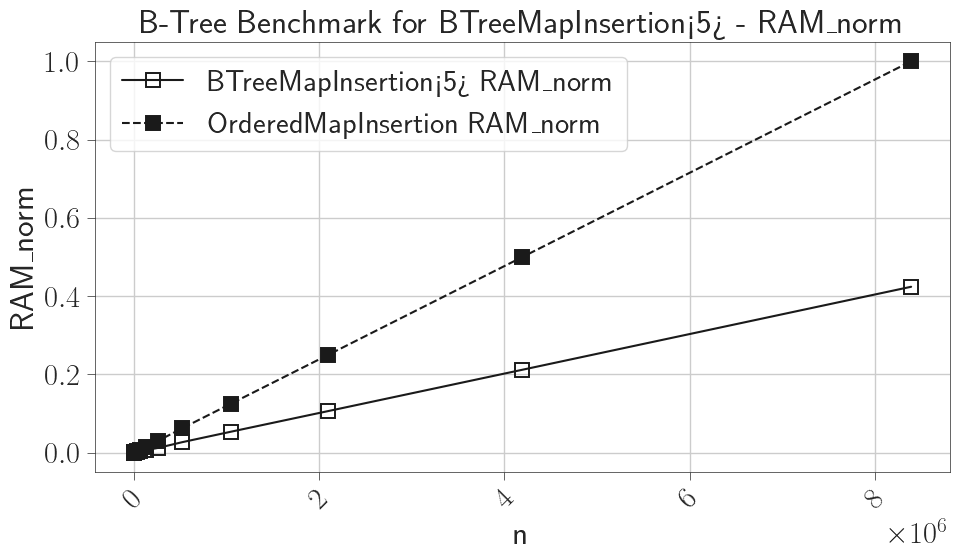

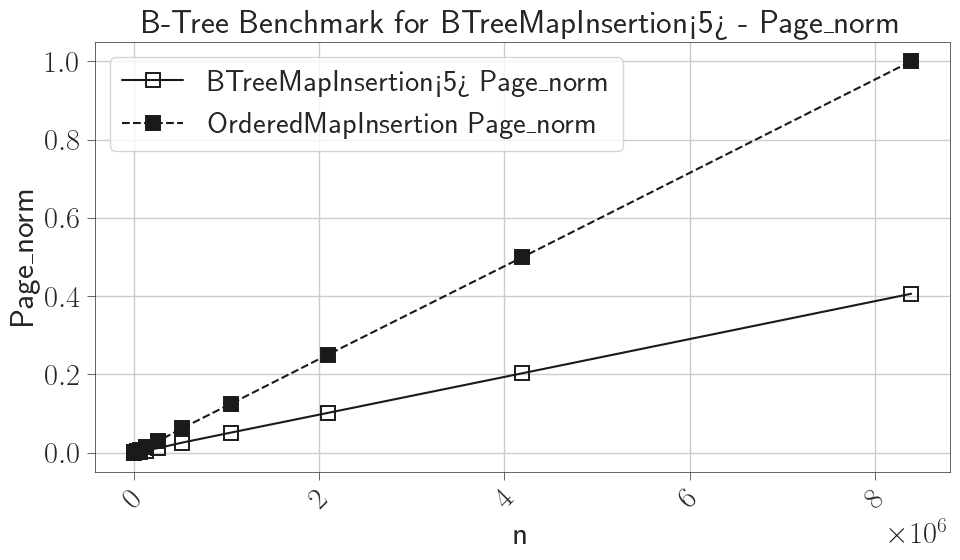

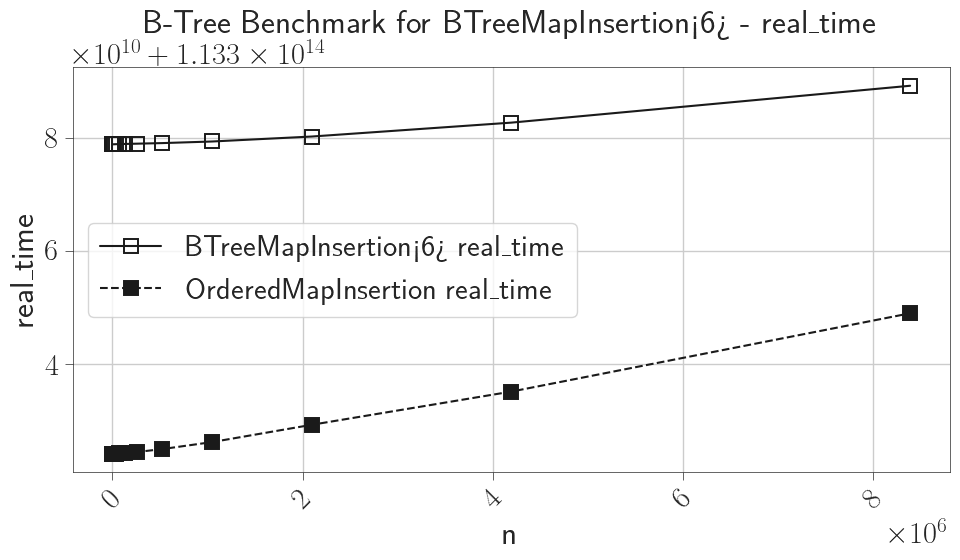

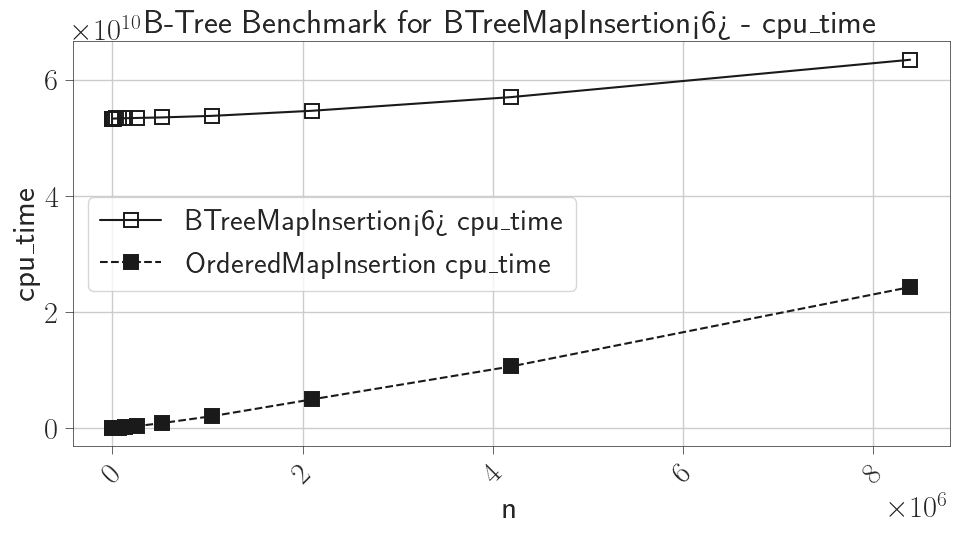

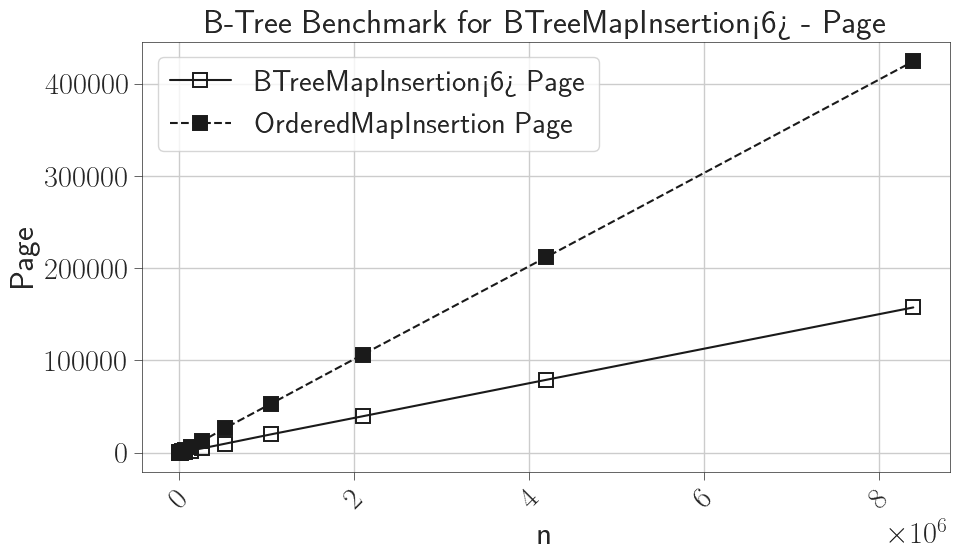

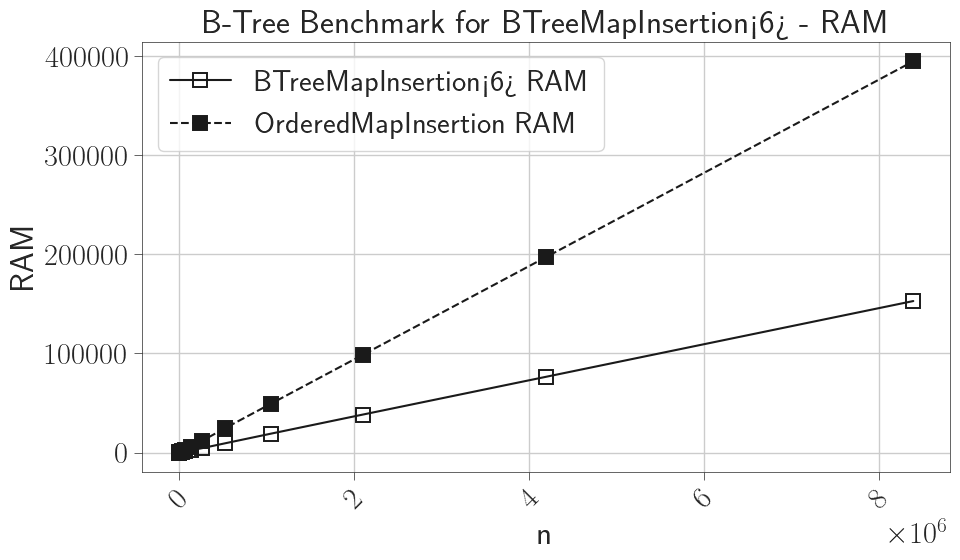

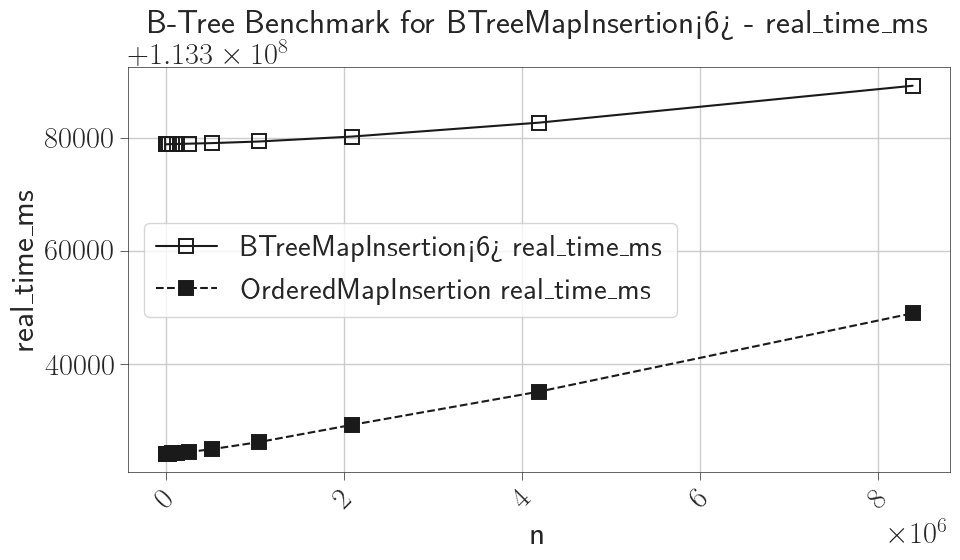

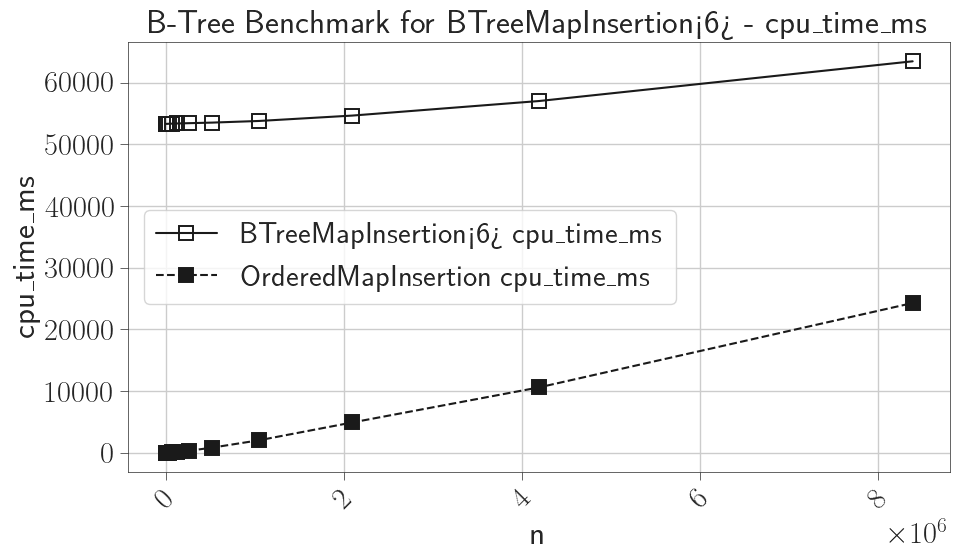

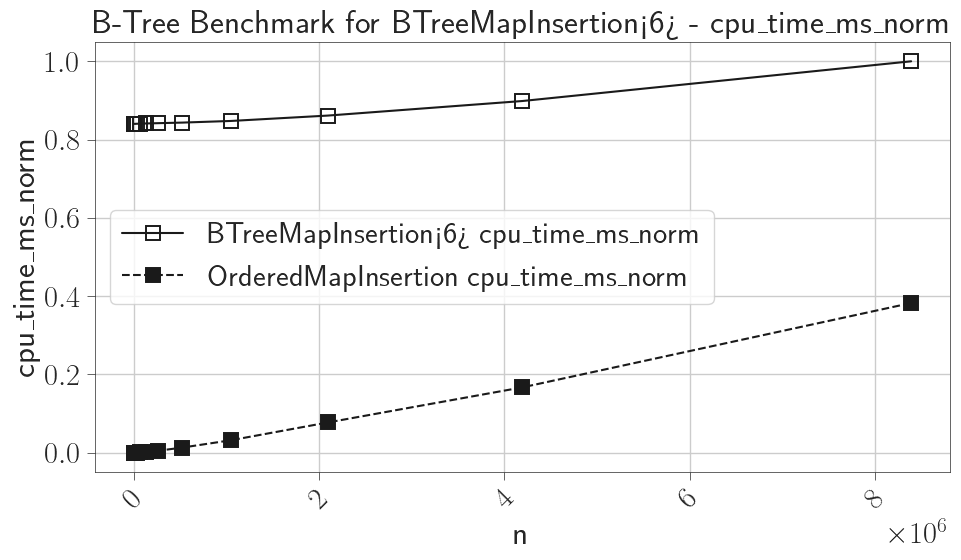

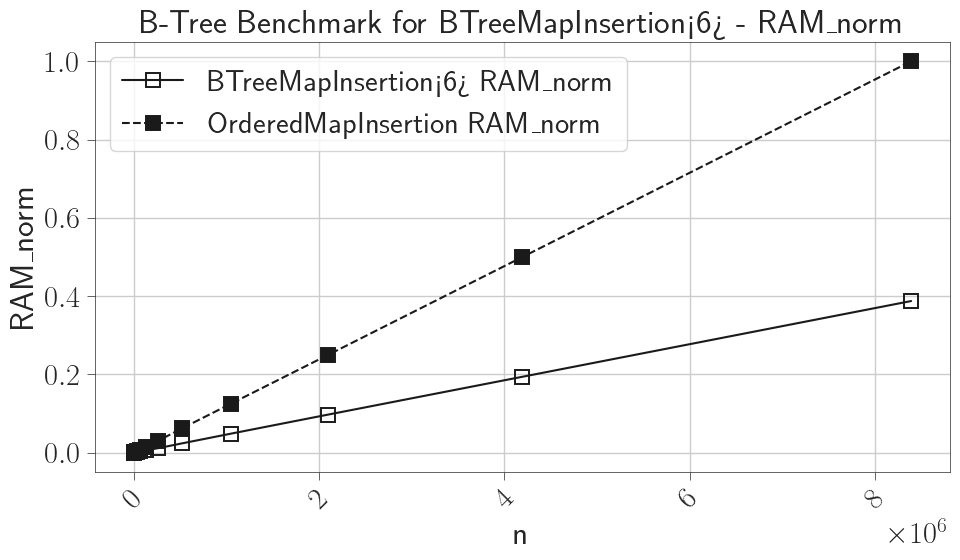

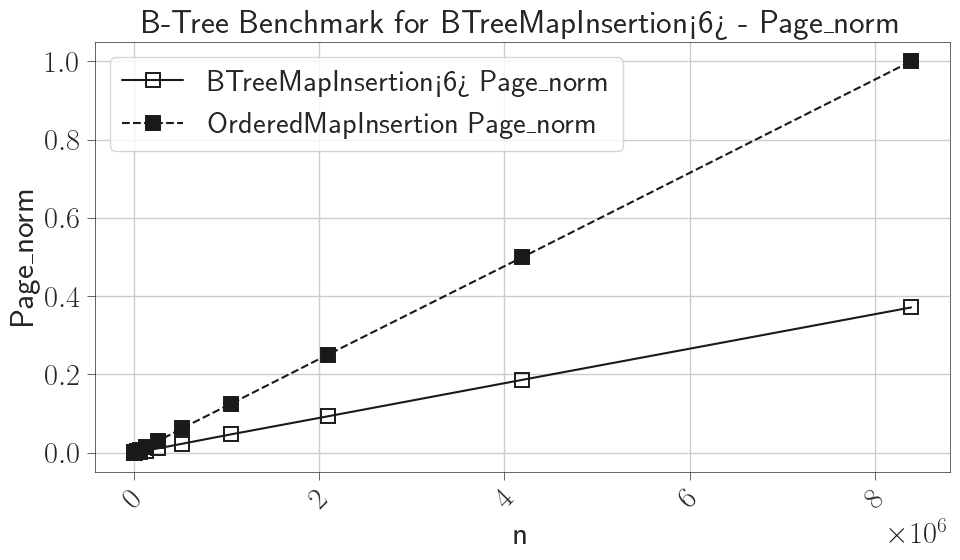

In [168]:
# Get unique names
unique_names = btree_df['name'].unique()

# Columns to exclude from plotting
exclude_columns = ['name', 'n']

# Plot each unique name
for name in unique_names:
    if name == 'OrderedMapInsertion': continue

    filtered_df = btree_df[btree_df['name'] == name]

    filtered_df2 = btree_df[btree_df['name'] == 'OrderedMapInsertion']

    for column in filtered_df.columns:
        if column not in exclude_columns:
            f, ax = plt.subplots(figsize=(10, 6))

            sns.lineplot(
                data=filtered_df,
                x='n',
                y=column,
                marker='s',
                markerfacecolor='none',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=10,
                color='k',
                linewidth=1.5,
                label=name + ' ' + column,
                ax=ax
            )

            sns.lineplot(
                data=filtered_df2,
                x='n',
                y=column,
                marker='s',
                # markerfacecolor='none',
                linestyle='--',
                markeredgecolor='k',
                markeredgewidth=1.4,
                markersize=10,
                color='k',
                linewidth=1.5,
                label='OrderedMapInsertion' + ' ' + column,
                ax=ax
            )

            ax.set_title(f"B-Tree Benchmark for {name} - {column}")
            ax.set_xlabel('n')
            ax.set_ylabel(column)
            ax.grid(True)
            ax.legend()
            ax.tick_params(width=0.5)
            ax.spines['top'].set_linewidth(0.5)
            ax.spines['right'].set_linewidth(0.5)
            ax.spines['left'].set_linewidth(0.5)
            ax.spines['bottom'].set_linewidth(0.5)

            plt.xticks(rotation=45)
            plt.tight_layout()
            # plt.savefig(ax.get_title().lower().replace(' ', '_') + '.pdf', bbox_inches='tight')
            plt.show()